# Sampling

![alt text](https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG)

As described earlier, one reason we need statistics is because we'd like to make statements about a general population based only on a subset - a *sample* - of the data. This can be for practical reasons, to reduce costs, or can be inherently necessary because of the nature of the problem. For example, it's not possible to collect data on "everyone who ever had a headache", so people wanting to study headaches will have to somehow get a group of people and try to generalize based on that.

What's the right way to build that group? If a drug company decides to only ask its employees if their headache drug works, does that have any problems?

*Yes* - let's discuss!

In [ ]:
help(random.sample)

Help on method sample in module random:

sample(population, k) method of random.Random instance
    Chooses k unique random elements from a population sequence or set.
    
    Returns a new list containing elements from the population while
    leaving the original population unchanged.  The resulting list is
    in selection order so that all sub-slices will also be valid random
    samples.  This allows raffle winners (the sample) to be partitioned
    into grand prize and second place winners (the subslices).
    
    Members of the population need not be hashable or unique.  If the
    population contains repeats, then each occurrence is a possible
    selection in the sample.
    
    To choose a sample in a range of integers, use range as an argument.
    This is especially fast and space efficient for sampling from a
    large population:   sample(range(10000000), 60)



In [ ]:
population = range(100)
sample = random.sample(population, 10)
print(sample)

[81, 62, 25, 72, 94, 76, 8, 20, 43, 57]


In general - a sampling process is good if your collected observations are *independent* and *identically distributed* - this property is called [IID](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) and there's plenty of math proofs about it, but the intuition is fairly straightforward:

- Independent: the likelihood of any particular observation being included in your sample isn't influenced by the inclusion or exclusion of any other particular observation
- Identically distributed: all observations in your sample are generated by the same underlying probability distribution as the population

You may be wondering - how big does my sample need to be? Good question! We won't go into it now, but this too is a question that hypothesis testing can help us answer.

## Conceptos básicos de la estadística descriptiva

En *[estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva)* se utilizan distintas medidas para intentar describir las propiedades de nuestros datos, algunos de los conceptos básicos, son:

* **Media aritmética**: La [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) es el valor obtenido al sumar todos los *[datos](https://es.wikipedia.org/wiki/Dato)* y dividir el resultado entre el número total elementos. Se suele representar con la letra griega $\mu$. Si tenemos una [muestra](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica) de $n$ valores, $x_i$, la *media aritmética*, $\mu$, es la suma de los valores divididos por el numero de elementos; en otras palabras:
$$\mu = \frac{1}{n} \sum_{i}x_i$$


* **Desviación respecto a la media**: La desviación respecto a la media es la diferencia en valor absoluto entre cada valor de la variable estadística y la media aritmética.
$$D_i = |x_i - \mu|$$


* **Varianza**: La [varianza](https://es.wikipedia.org/wiki/Varianza) es la media aritmética del cuadrado de las desviaciones respecto a la media de una distribución estadística. La varianza intenta describir la dispersión de los *[datos](https://es.wikipedia.org/wiki/Dato)*. Se representa como $\sigma^2$. 
$$\sigma^2 = \frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{n} $$


* **Desviación típica**: La [desviación típica](https://es.wikipedia.org/wiki/Desviaci%C3%B3n_t%C3%ADpica) es la raíz cuadrada de la varianza. Se representa con la letra griega $\sigma$.
$$\sigma = \sqrt{\frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{n}} $$


* **Moda**: La <a href="https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)">moda</a> es el valor que tiene mayor frecuencia absoluta. Se representa con $M_0$


* **Mediana**: La <a href="https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)">mediana</a> es el valor que ocupa el lugar central de todos los datos cuando éstos están ordenados de menor a mayor. Se representa con $\widetilde{x}$.


* **Correlación**: La [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) trata de establecer la relación o dependencia que existe entre las dos variables que intervienen en una distribución bidimensional. Es decir, determinar si los cambios en una de las variables influyen en los cambios de la otra. En caso de que suceda, diremos que las variables están correlacionadas o que hay correlación entre ellas. La correlación es positiva cuando los valores de las variables aumenta juntos; y es negativa cuando un valor de una variable se reduce cuando el valor de la otra variable aumenta.


* **Covarianza**: La [covarianza](https://es.wikipedia.org/wiki/Covarianza) es el equivalente de la varianza aplicado a una variable bidimensional. Es la media aritmética de los productos de las desviaciones de cada una de las variables respecto a sus medias respectivas.La covarianza indica el sentido de la correlación entre las variables; Si $\sigma_{xy} > 0$ la correlación es directa; Si $\sigma_{xy} < 0$ la correlación es inversa.

$$\sigma_{xy} = \frac{\sum\limits_{i=1}^n(x_i - \mu_x)(y_i -\mu_y)}{n}$$


* **Valor atípico**: Un [valor atípico](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) es una observación que se aleja demasiado de la moda; esta muy lejos de la tendencia principal del resto de los *[datos](https://es.wikipedia.org/wiki/Dato)*. Pueden ser causados por errores en la recolección de *[datos](https://es.wikipedia.org/wiki/Dato)* o medidas inusuales. Generalmente se recomienda eliminarlos del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos).


### Ejemplos en Python

Calcular los principales indicadores de la *[estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva)* con [Python](http://python.org/) es muy fácil!.

In [1]:
# Ejemplos de estadistica descriptiva con python

import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

np.random.seed(2131982) # para poder replicar el random

In [2]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

array([[ 0.46038022, -1.08942528, -0.62681496, -0.63329028],
       [-0.1074033 , -0.88138082, -0.34466623, -0.28320214],
       [ 0.94051171,  0.86693793,  1.20947882, -0.16894118],
       [-0.12790177, -0.58099931, -0.46188426, -0.18148302],
       [-0.76959435, -1.37414587,  1.37696874, -0.18040537]])

In [3]:
# media arítmetica
datos.mean() # Calcula la media aritmetica de

-0.14786303590303568

In [4]:
np.mean(datos) # Mismo resultado desde la funcion de numpy

-0.14786303590303568

In [5]:
datos.mean(axis=1) # media aritmetica de cada fila

array([-0.47228757, -0.40416312,  0.71199682, -0.33806709, -0.23679421])

In [6]:
datos.mean(axis=0) # media aritmetica de cada columna

array([ 0.0791985 , -0.61180267,  0.23061642, -0.2894644 ])

In [7]:
# mediana
np.median(datos) 

-0.23234258265023794

In [8]:
np.median(datos, 0) # media aritmetica de cada columna

array([-0.1074033 , -0.88138082, -0.34466623, -0.18148302])

In [9]:
 # Desviación típica
np.std(datos)

0.73755354584071608

In [10]:
np.std(datos, 0) # Desviación típica de cada columna

array([ 0.58057213,  0.78352862,  0.87384108,  0.17682485])

In [11]:
# varianza
np.var(datos) 

0.54398523298221324

In [12]:
np.var(datos, 0) # varianza de cada columna

array([ 0.337064  ,  0.6139171 ,  0.76359823,  0.03126703])

In [13]:
# moda
stats.mode(datos) # Calcula la moda de cada columna
# el 2do array devuelve la frecuencia.

(array([[-0.76959435, -1.37414587, -0.62681496, -0.63329028]]),
 array([[ 1.,  1.,  1.,  1.]]))

In [14]:
datos2 = np.array([1, 2, 3, 6, 6, 1, 2, 4, 2, 2, 6, 6, 8, 10, 6])
stats.mode(datos2) # aqui la moda es el 6 porque aparece 5 veces en el vector.

(array([6]), array([ 5.]))

In [15]:
# correlacion
np.corrcoef(datos) # Crea matriz de correlación.

array([[ 1.        ,  0.82333743,  0.15257202,  0.78798675, -0.02292073],
       [ 0.82333743,  1.        , -0.13709662,  0.86873632,  0.41234875],
       [ 0.15257202, -0.13709662,  1.        , -0.47691376,  0.21216856],
       [ 0.78798675,  0.86873632, -0.47691376,  1.        , -0.03445705],
       [-0.02292073,  0.41234875,  0.21216856, -0.03445705,  1.        ]])

In [16]:
# calculando la correlación entre dos vectores.
np.corrcoef(datos[0], datos[1])

array([[ 1.        ,  0.82333743],
       [ 0.82333743,  1.        ]])

In [17]:
# covarianza
np.cov(datos) # calcula matriz de covarianza

array([[ 0.43350958,  0.18087281,  0.06082243,  0.11328658, -0.01782409],
       [ 0.18087281,  0.11132485, -0.0276957 ,  0.06329134,  0.16249513],
       [ 0.06082243, -0.0276957 ,  0.36658864, -0.06305065,  0.15172255],
       [ 0.11328658,  0.06329134, -0.06305065,  0.04767826, -0.00888624],
       [-0.01782409,  0.16249513,  0.15172255, -0.00888624,  1.39495179]])

In [18]:
# covarianza de dos vectores
np.cov(datos[0], datos[1])

array([[ 0.43350958,  0.18087281],
       [ 0.18087281,  0.11132485]])

In [19]:
# usando pandas
dataframe = pd.DataFrame(datos, index=['a', 'b', 'c', 'd', 'e'], 
                        columns=['col1', 'col2', 'col3', 'col4'])
dataframe

,col1,col2,col3,col4
a,0.460380,-1.089425,-0.626815,-0.633290
b,-0.107403,-0.881381,-0.344666,-0.283202
c,0.940512,0.866938,1.209479,-0.168941
d,-0.127902,-0.580999,-0.461884,-0.181483
e,-0.769594,-1.374146,1.376969,-0.180405


In [20]:
# resumen estadistadistico con pandas
dataframe.describe()

,col1,col2,col3,col4
count,5.000000,5.000000,5.000000,5.000000
mean,0.079199,-0.611803,0.230616,-0.289464
std,0.649099,0.876012,0.976984,0.197696
min,-0.769594,-1.374146,-0.626815,-0.633290
25%,-0.127902,-1.089425,-0.461884,-0.283202
50%,-0.107403,-0.881381,-0.344666,-0.181483
75%,0.460380,-0.580999,1.209479,-0.180405
max,0.940512,0.866938,1.376969,-0.168941


In [21]:
# sumando las columnas
dataframe.sum()

col1    0.395993
col2   -3.059013
col3    1.153082
col4   -1.447322
dtype: float64

In [22]:
# sumando filas
dataframe.sum(axis=1)

a   -1.889150
b   -1.616652
c    2.847987
d   -1.352268
e   -0.947177
dtype: float64

In [23]:
dataframe.cumsum() # acumulados

,col1,col2,col3,col4
a,0.460380,-1.089425,-0.626815,-0.633290
b,0.352977,-1.970806,-0.971481,-0.916492
c,1.293489,-1.103868,0.237998,-1.085434
d,1.165587,-1.684867,-0.223887,-1.266917
e,0.395993,-3.059013,1.153082,-1.447322


In [24]:
# media aritmetica de cada columna con pandas
dataframe.mean()

col1    0.079199
col2   -0.611803
col3    0.230616
col4   -0.289464
dtype: float64

In [25]:
# media aritmetica de cada fila con pandas
dataframe.mean(axis=1)

a   -0.472288
b   -0.404163
c    0.711997
d   -0.338067
e   -0.236794
dtype: float64

## Histogramas y Distribuciones

Muchas veces los indicadores de la *[estadística descriptiva](https://es.wikipedia.org/wiki/Estad%C3%ADstica_descriptiva)* no nos proporcionan una imagen clara de nuestros *[datos](https://es.wikipedia.org/wiki/Dato)*.  Por esta razón, siempre es útil complementarlos con gráficos de las distribuciones de los *[datos](https://es.wikipedia.org/wiki/Dato)*, que describan con qué frecuencia aparece cada valor. La representación más común de una distribución es un [histograma](https://es.wikipedia.org/wiki/Histograma), que es un gráfico que muestra la frecuencia o probabilidad de cada valor. El [histograma](https://es.wikipedia.org/wiki/Histograma) muestra las frecuencias como un gráfico de barras que indica cuan frecuente un determinado valor ocurre en el [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). El eje horizontal representa los valores del [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) y el eje vertical representa la frecuencia con que esos valores ocurren.

Las distribuciones se pueden clasificar en dos grandes grupos:

1. Las **[distribuciones continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua)**, que son aquellas que presentan un número infinito de posibles soluciones. Dentro de este grupo vamos a encontrar a las distribuciones: 
    * [normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal),
    * [gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma),
    * [chi cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2), 
    * [t de Student](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student), 
    * [pareto](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Pareto),
    * entre otras

2. Las **distribuciones discretas**, que son aquellas en las que la variable puede pude tomar un número determinado de valores. Los principales exponenetes de este grupo son las distribuciones: 
    * [poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson),
    * [binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial),
    * [hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica),
    * [bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli)
    * entre otras

Veamos algunos ejemplos graficados con la ayuda de [Python](http://python.org/).

### Distribución normal

La [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) es una de las principales distribuciones, ya que es la que con más frecuencia aparece aproximada en los fenómenos reales. Tiene una forma acampanada y es simétrica respecto de un determinado parámetro estadístico. Con la ayuda de [Python](http://python.org/) la podemos graficar de la siguiente manera:

In [26]:
# Graficos embebidos.
%matplotlib inline 

In [27]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [28]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

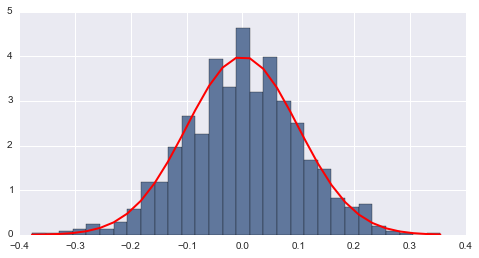

In [29]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(s, 30, normed=True)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

### Distribuciones simetricas y asimetricas

Una distribución es simétrica cuando moda, mediana y media coinciden aproximadamente en sus valores. Si una distribución es simétrica, existe el mismo número de valores a la derecha que a la izquierda de la media, por tanto, el mismo número de desviaciones con signo positivo que con signo negativo.

Una distribución tiene [asimetria](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) positiva (o a la derecha) si la "cola" a la derecha de la media es más larga que la de la izquierda, es decir, si hay valores más separados de la media a la derecha. De la misma forma una distribución tiene [asimetria](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) negativa (o a la izquierda) si la "cola" a la izquierda de la media es más larga que la de la derecha, es decir, si hay valores más separados de la media a la izquierda.

Las distribuciones asimétricas suelen ser problemáticas, ya que la mayoría de los métodos estadísticos suelen estar desarrollados para distribuciones del tipo [normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal). Para salvar estos problemas se suelen realizar transformaciones a los datos para hacer a estas distribuciones más simétricas y acercarse a la [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal).  

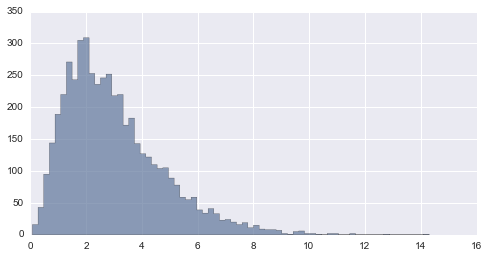

In [30]:
# Dibujando la distribucion Gamma
x = stats.gamma(3).rvs(5000)
gamma = plt.hist(x, 70, histtype="stepfilled", alpha=.7)

En este ejemplo podemos ver que la [distribución gamma](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_gamma) que dibujamos tiene una [asimetria](https://es.wikipedia.org/wiki/Asimetr%C3%ADa_estad%C3%ADstica) positiva. 

In [31]:
# Calculando la simetria con scipy
stats.skew(x)

1.1437199125547868

## Cuartiles y diagramas de cajas

Los **[cuartiles](https://es.wikipedia.org/wiki/Cuartil)** son los tres valores de la variable estadística que dividen a un [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos) ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la <a href="https://es.wikipedia.org/wiki/Mediana_(estad%C3%ADstica)">mediana</a>.

Los [diagramas de cajas](https://es.wikipedia.org/wiki/Diagrama_de_caja) son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) y comparar dos [conjunto de datos](https://es.wikipedia.org/wiki/Conjunto_de_datos). 


<img alt="diagrama de cajas" title="Diagrama de cajas" src="http://relopezbriega.github.io/images/diagCajas.png" width="600">

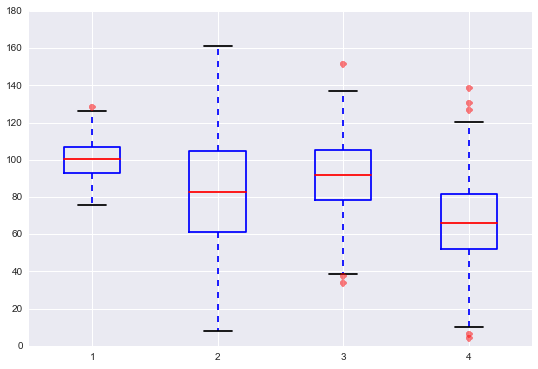

In [32]:
# Ejemplo de grafico de cajas en python

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

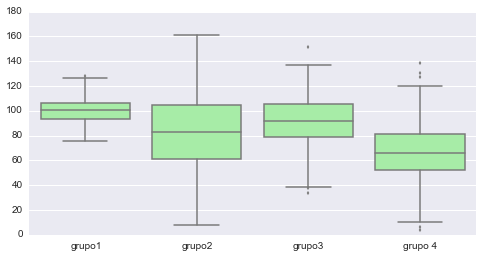

In [33]:
# usando seaborn
sns.boxplot(datos_graf, names=["grupo1", "grupo2", "grupo3", "grupo 4"],
            color="PaleGreen");